### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №8

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гусейнов Вахид Азерович
##### Группа:   НБИбд-01-17

## Москва 2020
***

### Вариант № 19

Ecoli Data Set

Название файла: ecoli.data

Ссылка: http://archive.ics.uci.edu/ml/datasets/Ecoli

Предиктор: mcg (столбец No 2)

Зависимая переменная: gvh (столбец No 3)

1. Считайте заданный набор данных из репозитария UCI (независимую и
зависимую переменные).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data'
data = pd.read_csv(url, header=None, delim_whitespace=True, usecols=[1, 2])
data.head()

,1,2
0,0.49,0.29
1,0.07,0.40
2,0.56,0.40
3,0.59,0.49
4,0.23,0.32


2. Если в столбцах для независимой или зависимой переменных имеются
пропущенные значения, то удалите данные

In [3]:
data = data.replace('?', np.nan)
data.isna().sum()

1    0
2    0
dtype: int64

Нет пропусков

3. Масштабируйте независимую и зависимую переменную на диапазон от 0 до 1 и
визуализируйте набор данных на плоскости (ось абсцисс - независимая
переменная, ось ординат - зависимая переменная).

In [4]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
X = data_scaled[:, 0].reshape(-1, 1)
y = data_scaled[:, 1]

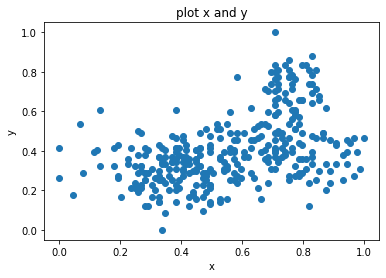

In [6]:
plt.title('plot x and y')
plt.ylabel('y')
plt.xlabel('x')
plt.scatter(X, y);

4. Разбейте набор данных на обучающую и тестовую выборки.

In [7]:
seed = 111
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

5.  Постройте регресоры на базе следующих моделей регрессии:
- линейной регрессии (LinearRegression)
- полиномиальной регрессии (PolynomialFeatures+LinearRegression)
- стохастического градиентного спуска (SGDRegressor)
- гребневой регрессии (Ridge)
- лассо регрессии (Lasso)
- регрессии эластичная сеть (ElasticNet)
- регрессии на основе метода ближайших соседей (KNeighborsRegressor)
- регрессии на основе деревьев решений (DecisionTreeRegressor)
- регрессии на основе метода опорных векторов (SVR)

In [8]:
degree = 2
lr = LinearRegression()
plr = Pipeline([
    ('poly', PolynomialFeatures(degree)),
    ('scaler', StandardScaler()),
    ('LR', LinearRegression())])
sgd = SGDRegressor()
ridge = Ridge()
lasso = Lasso()
enet = ElasticNet()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor()
svm = SVR()

models = [lr, plr, sgd, ridge, lasso, enet, knn, tree, svm]
names = ['Linear Regression', 'Polynomial Regression', 'SGDRegression', 'Ridge',
        'Lasso', 'ElasticNet', 'KNNRegression', 'DecisionTreeRegression', 'SVM']

In [9]:
preds = []
scores = []
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = r2_score(y_test, pred)
    
    preds.append(preds)
    scores.append(score)

In [10]:
for score, name in sorted(zip(scores, names), reverse=True):
    print(name, 'score =', score)

Polynomial Regression score = 0.33056800958847665
Linear Regression score = 0.3298036847827367
Ridge score = 0.31916846844189195
SVM score = 0.2990288331137708
SGDRegression score = 0.2392920423271545
KNNRegression score = 0.11316834592570091
Lasso score = -0.0028261110925156263
ElasticNet score = -0.0028261110925156263
DecisionTreeRegression score = -0.06479151904691194


6. При помощи GridSearch определите оптимальные параметры регрессоров
(кроме LinearRegression).

In [11]:
# задаем сетку для каждой модели
params_poly = {'poly__degree': [deg for deg in range(2, 11)]}
params_sgd = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l1', 'l2', 'elasticnet'],}
params_ridge = {
    'fit_intercept': [True, False],
    'alpha': [i / 1000 for i in range(1, 100001, 200)]}
params_lasso = {
    'fit_intercept': [True, False],
    'alpha': [i / 1000 for i in range(1, 100001, 200)]}
params_enet = {
    'fit_intercept': [True, False],
    'alpha': [i / 1000 for i in range(1, 10001, 500)],
    'l1_ratio': [i / 1000 for i in range(1, 10001, 500)]}
params_knn = {
    'n_neighbors': [i for i in range(1, 31)],
    'weights': ['uniform', 'distance'],
    'p': [0.5, 1, 2, 3]}
params_tree = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'min_samples_leaf': [i for i in range(1, 11)]}
params_svm = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]}

params_models = [params_poly, params_sgd, params_ridge, params_lasso, params_enet, params_knn, params_tree, params_svm]
best_models = [LinearRegression().fit(X_train, y_train)]
for model, params in zip(models[1:], params_models):
    clf = GridSearchCV(model, params, scoring='r2', cv=5)
    clf.fit(X_train, y_train)
    best_models.append(clf.best_estimator_)

7. Визуализируйте на плоскости точки тестовой выборки и графики различных
моделей регрессий разными цветами. Подпишите оси и создайте легенду для
графика.

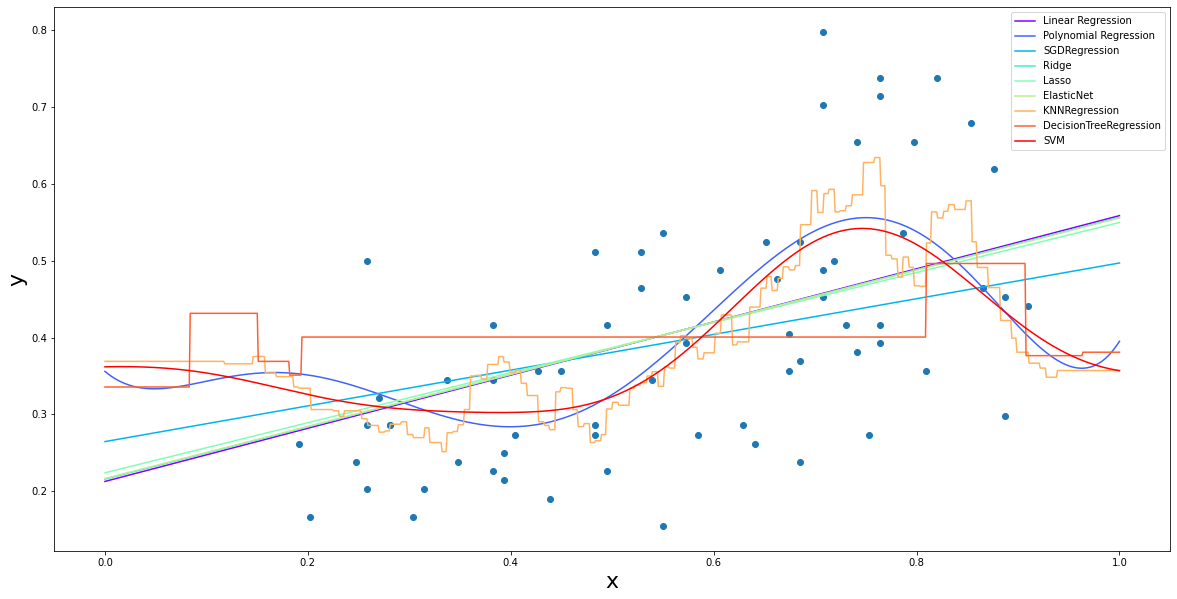

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test, y_test)
x_space = np.linspace(0, 1, 1000).reshape(-1, 1)
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(best_models))))
for model, name in zip(best_models, names):
    c = next(color)
    y_pred = model.predict(x_space)
    plt.plot(x_space, y_pred, c=c, label=name)
plt.xlabel('x', fontsize=22)
plt.ylabel('y', fontsize=22)
plt.legend()
plt.show()

8. Определите лучший регрессор по показателю коэффициент детерминации.


In [13]:
scores_of_best = [r2_score(y_test, best_model.predict(X_test)) for best_model in best_models]
for score, name in sorted(zip(scores_of_best, names), reverse=True):
    print(name, 'score =', score)

KNNRegression score = 0.34605683194737025
SVM score = 0.34002358451094794
Linear Regression score = 0.3298036847827367
Ridge score = 0.3276984277104863
ElasticNet score = 0.3269863812218964
Lasso score = 0.32107283501728157
Polynomial Regression score = 0.31564821311554603
SGDRegression score = 0.26796526606955995
DecisionTreeRegression score = 0.06886700793567113


Лучший регрессор - KNN Regressor